# Project AIM:
Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all
irrespective of any status. You are required to analyze this health and medical data for better
future preparation.
Do ETL: Extract- Transform and Load data from the heart disease diagnostic database

In [1]:
#Importing all the libraries that we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing our dataset.
df = pd.read_csv('Heart Disease data.csv')

In [3]:
#checking first ten rows by calling df.head()
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [59]:
##checking first ten rows by calling df.head()
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
#take a look at the colmun names.
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

# Columns description 

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [6]:
#checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#concise summary of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Let's get a `quick overview` of the full dataset.

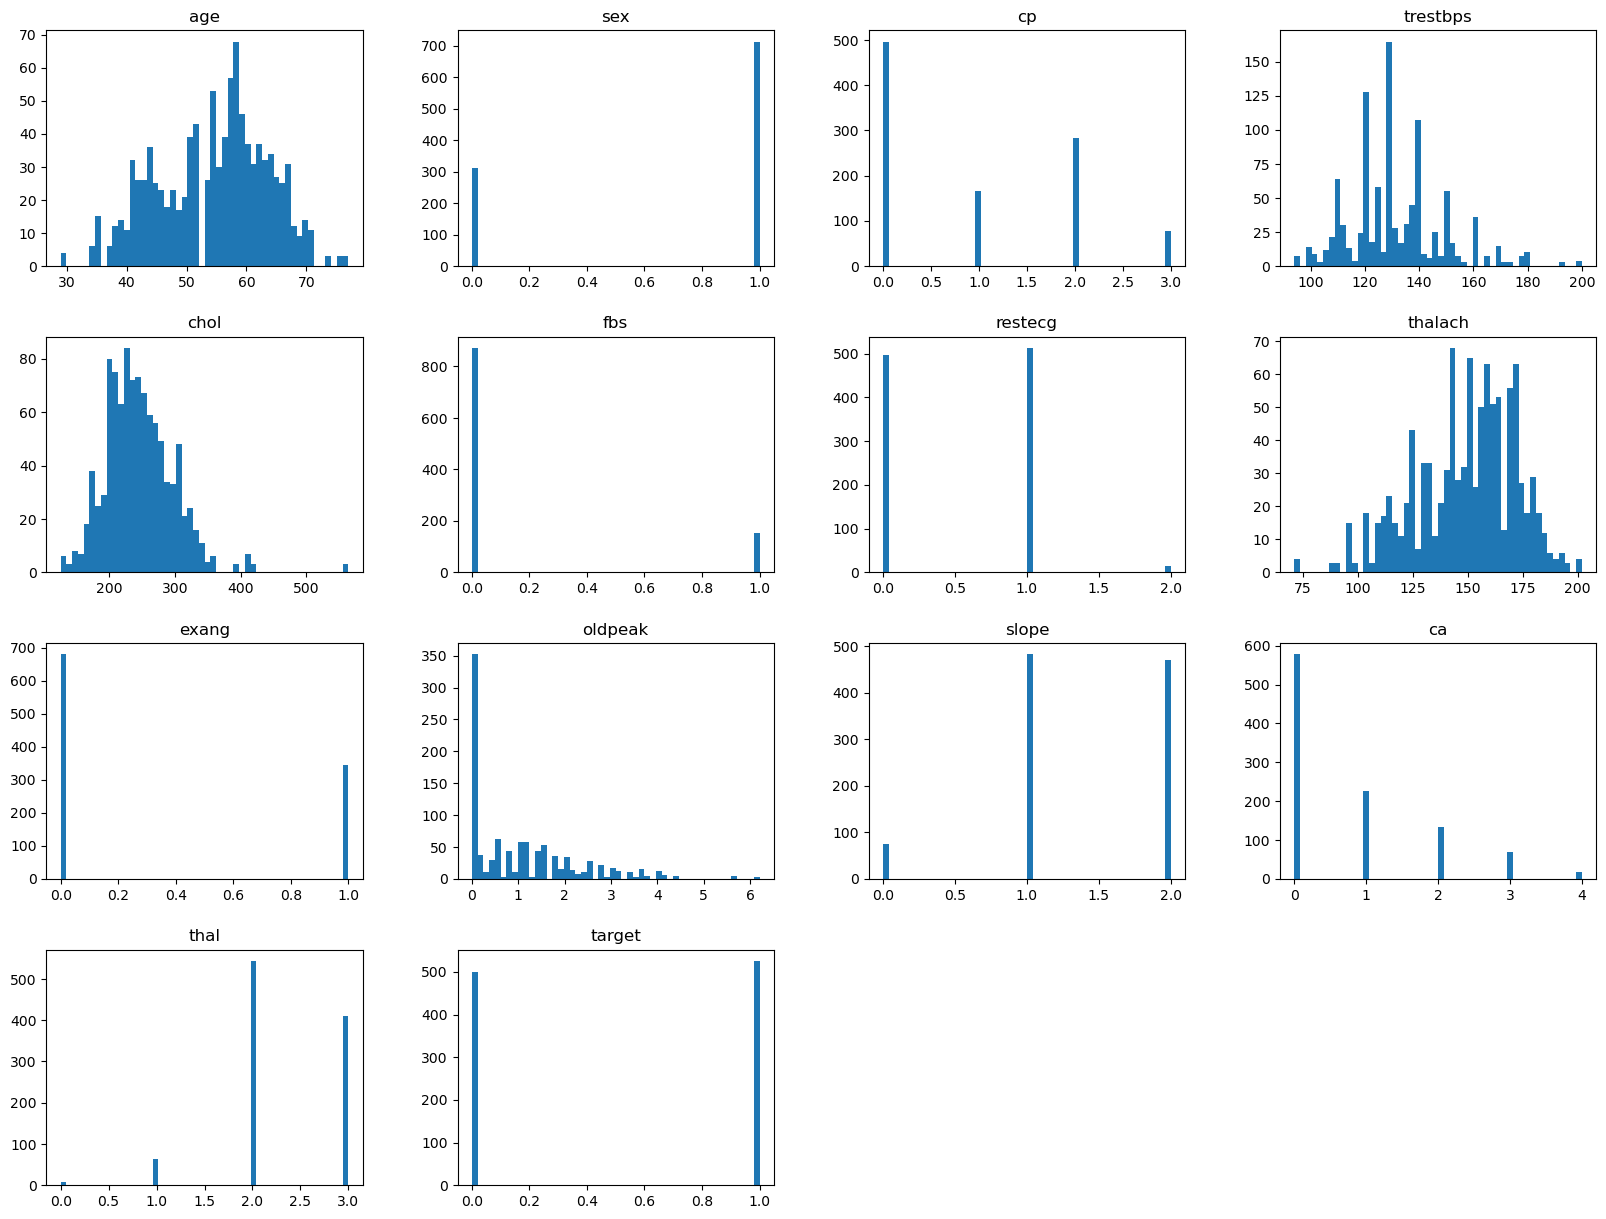

In [8]:
#plotting histogram of all numeric values
df.hist(bins = 50, grid = False, figsize=(20,15));

In [9]:
#Generating descriptive statistics.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data analysis

# How many people have heart disease and how many people doesn't have heart disease?

In [10]:
#getting the values
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

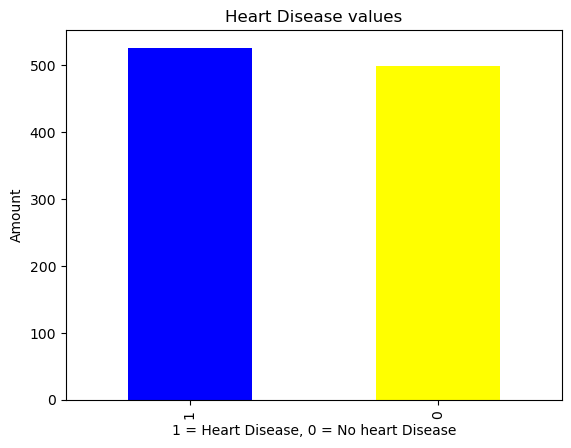

In [11]:
#plotting bar chart.
df.target.value_counts().plot(kind = 'bar', color=["blue", "yellow"])
plt.title("Heart Disease values")
plt.xlabel("1 = Heart Disease, 0 = No heart Disease")
plt.ylabel("Amount");

`0` represent `Female`

`1` represent `Male`

`0` represent `No disease`

`1` represent `Disease`

Now let's check how many `Male` and `Female` are in the dataset

In [12]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

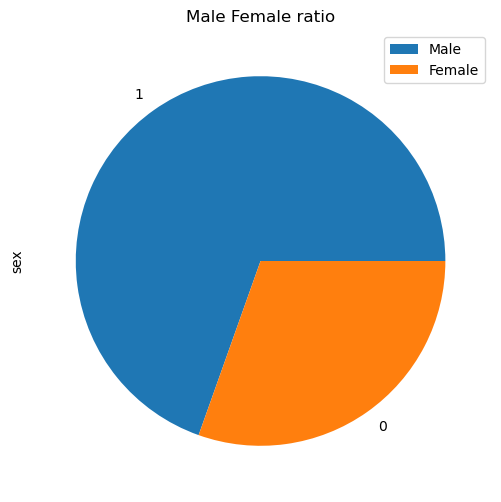

In [13]:
#plotting a pie chart
df.sex.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.title('Male Female ratio')
plt.legend(['Male', 'Female']);

# People of which sex has most heart disease?

In [14]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


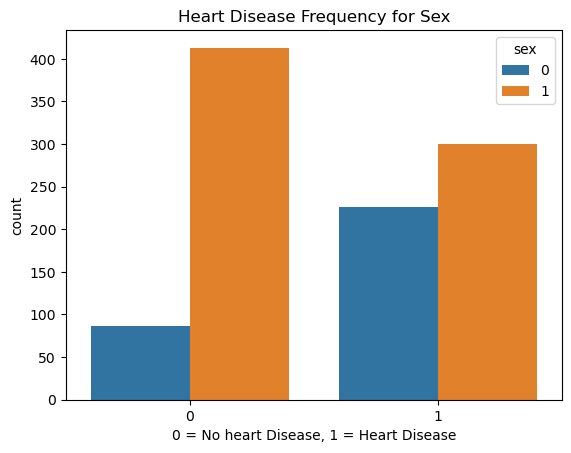

In [15]:
sns.countplot(x = 'target', data = df, hue = 'sex')
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease");

Number of male is more than double in our dataset than female.

More than `45% male` has heart disease and `75% female` has heart disease.

# People of which sex has which type of chest pain most?

In [16]:
#counting values for different chest pain
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

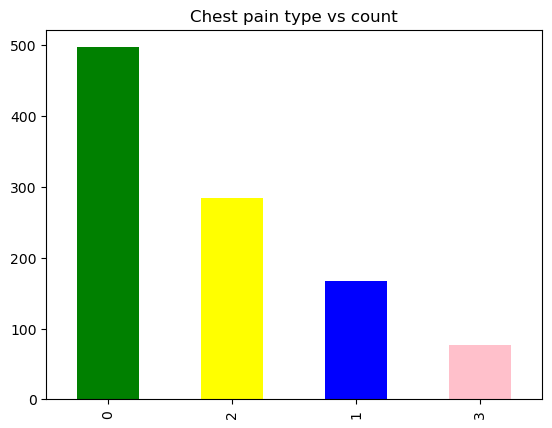

In [17]:
#plotting a bar chart
df.cp.value_counts().plot(kind = 'bar', color = ['green', 'yellow', 'blue', 'pink'])
plt.title('Chest pain type vs count');

# Let's see people of which sex has which type of chest pain as a dataframe and then plot them as a bar chart.

In [18]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


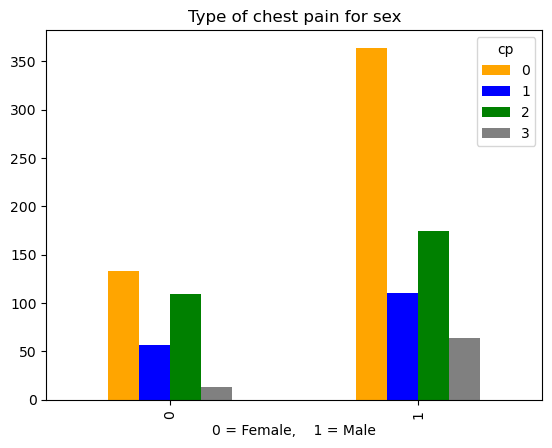

In [19]:
pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['orange', 'blue', 'green', 'grey'])

plt.title('Type of chest pain for sex')
plt.xlabel('0 = Female,    1 = Male');

Most of `male` has `type 0` chest pain and least of `Male` has `type 4` pain.

in case of `Female` `type 0` and `type 1` percentage is almost same.

# People with which chest pain are most pron to have heart disease?

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


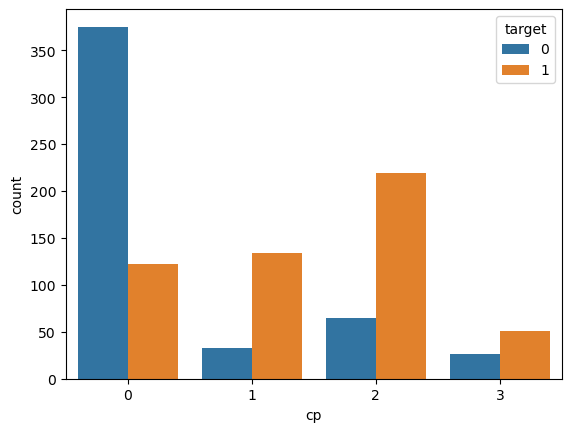

In [21]:
sns.countplot(x = 'cp', data = df, hue = 'target');

Most of people who has `type 0` chest pain has less chance of heart disease.

And we see the opposite for other types.

Now let's take look at our age column.

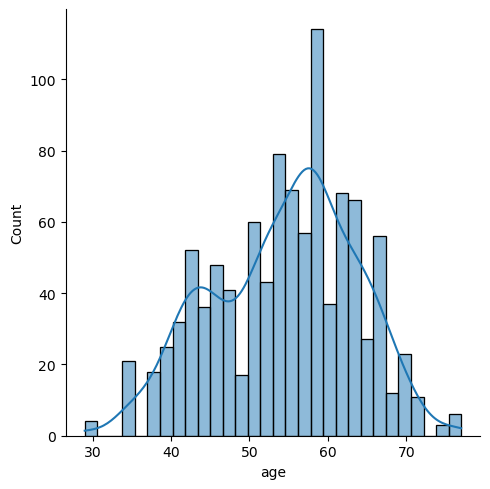

In [22]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = df, bins = 30, kde = True);

`58-59` year old people are most in the dataset.

Let's plot another distribution plot for `Maximum heart rate`

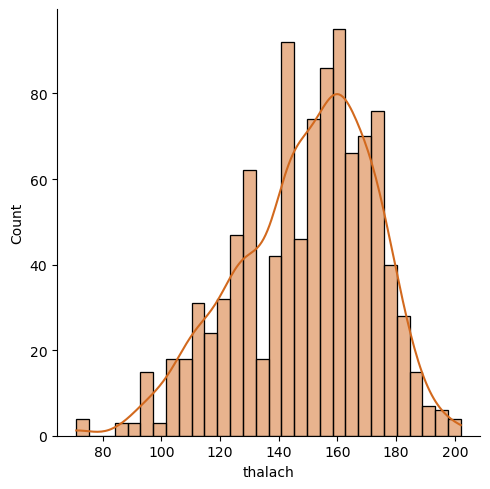

In [23]:
sns.displot(x = 'thalach', data = df, bins = 30, kde = True, color = 'chocolate');

From this plot we get a clear overview about Maximum heart rate represented by `thalach`

# Age vs Maximum heart rate when people have heart disease.


# Age vs Maximum heart rate when people doesn't have heart disease.

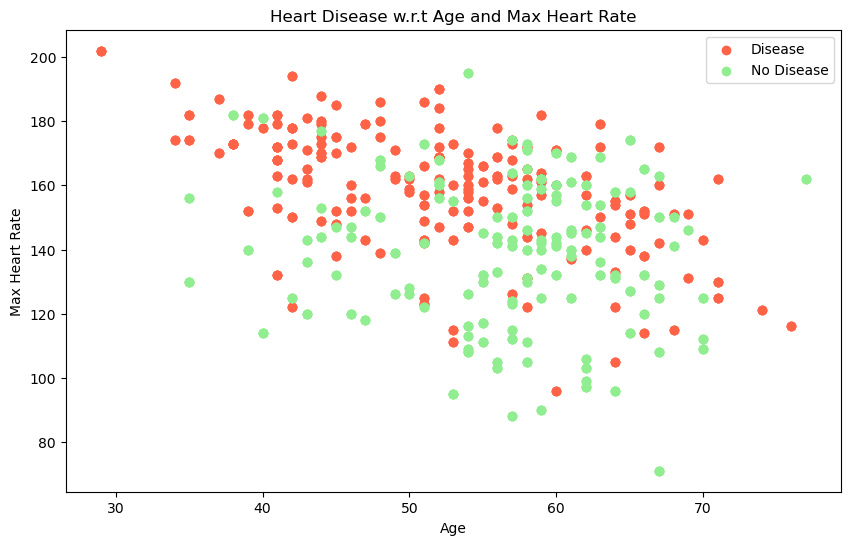

In [24]:
# Creating a figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="tomato") # color

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightgreen") # color

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Let's make a density curve for visualizing the distribution of `age` and `thalach` observations in our dataset. 

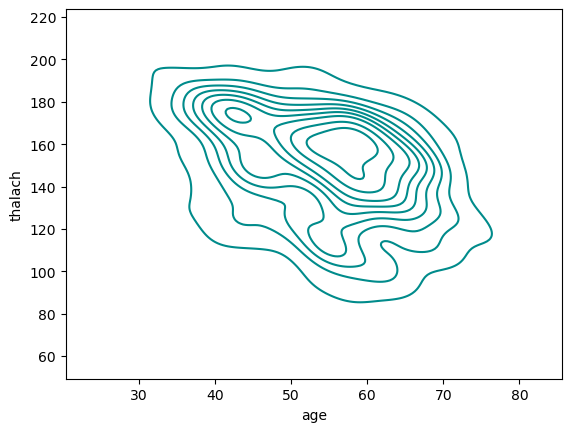

In [25]:
sns.kdeplot(x = 'age', y = 'thalach', data = df, color = 'darkcyan');

Distribution plot for `number of people with heart disease` vs `max heart rate`

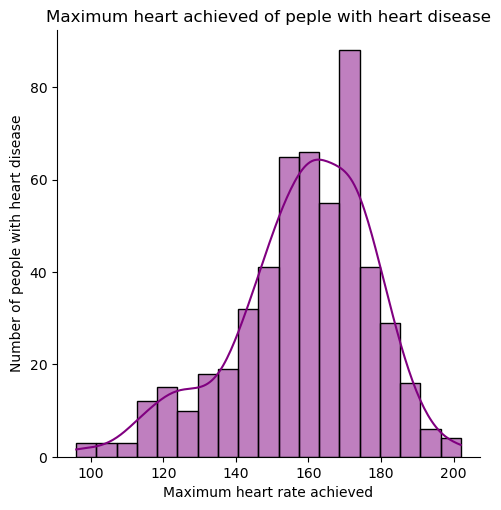

In [26]:
sns.displot(x = df.thalach[df.target==1], data = df, kde = True, color= 'purple')
plt.title("Maximum heart achieved of peple with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease");

Distribution plot for `number of people without heart disease` vs `max heart rate`

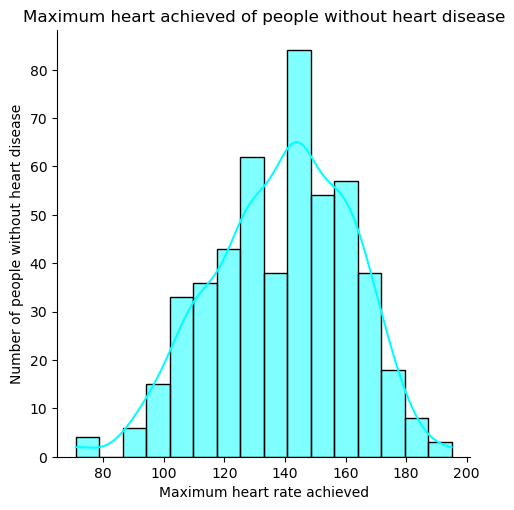

In [27]:
sns.displot(x = df.thalach[df.target==0], data = df, kde = True, color= 'cyan')
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

Let's first make a distribution plot for serum cholestoral

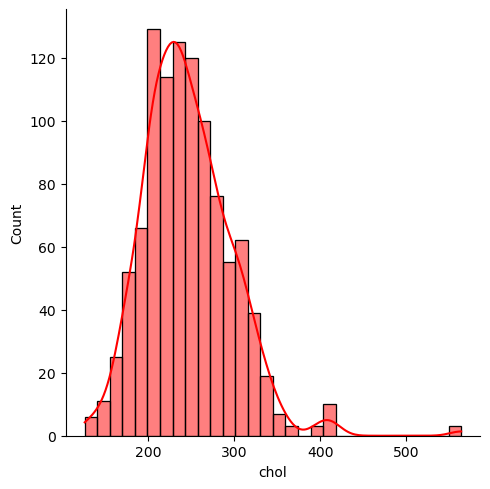

In [28]:
sns.displot(x = 'chol', data = df, bins = 30, kde = True, color = 'red');

Now let's plot another scatter plot for Age vs serum cholestoral

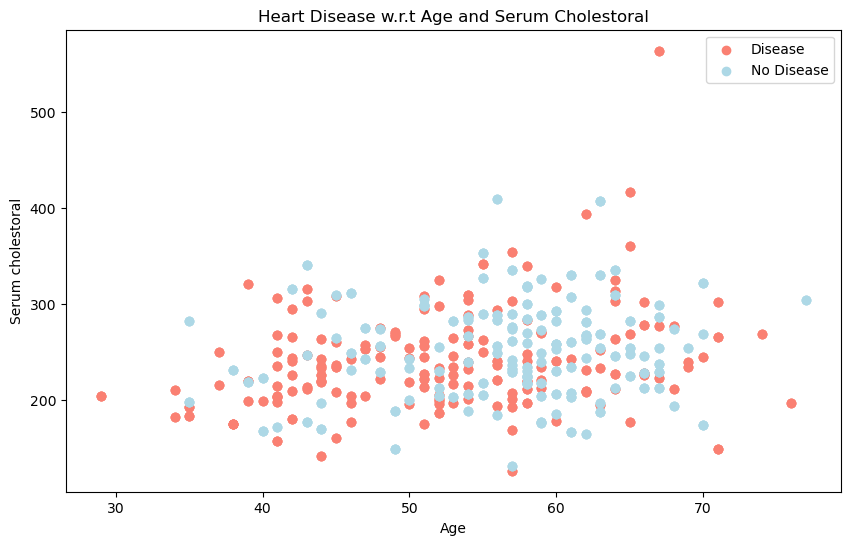

In [29]:
# Creating another figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="salmon") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral");

Let's make a density curve for visualizing the distribution of `age` and `chol` observations in our dataset. 

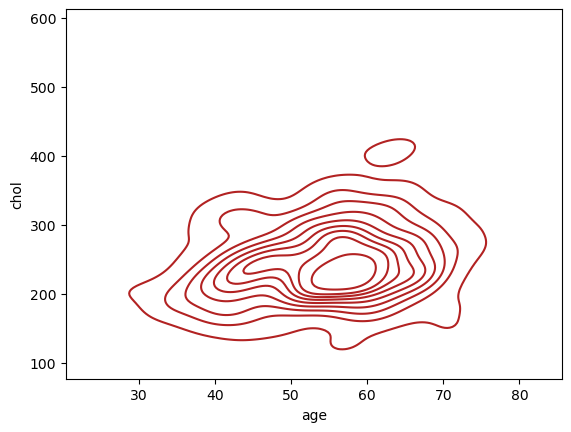

In [30]:
sns.kdeplot(x = 'age', y = 'chol', data = df, color = 'firebrick');

Distribution plot for `number of people with heart disease` vs `Serum Cholestoral`

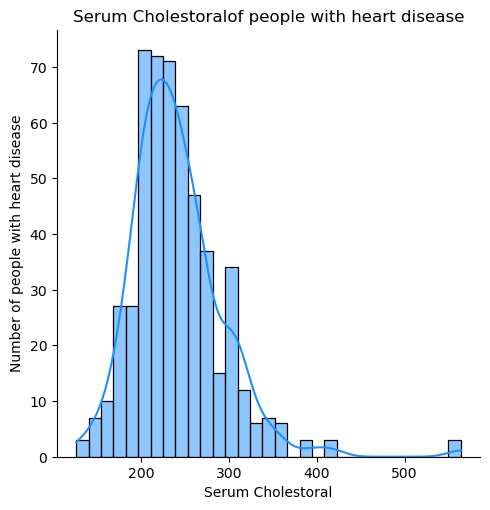

In [31]:
sns.displot(x = df.chol[df.target==1], data = df, kde = True, color= 'dodgerblue')
plt.title("Serum Cholestoralof people with heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people with heart disease");

Distribution plot for `number of people without heart disease` vs `Serum Cholestoral`

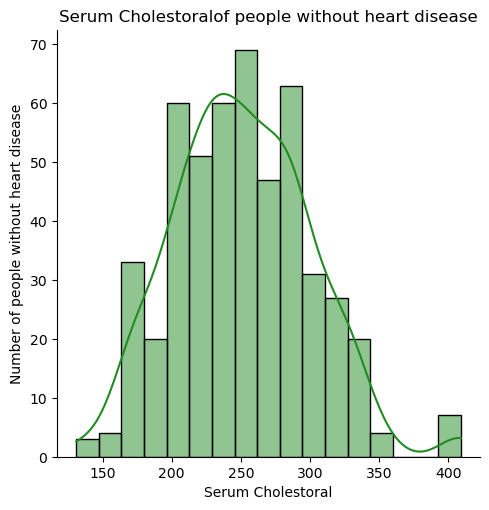

In [32]:
sns.displot(x = df.chol[df.target==0], data = df, kde = True, color= 'forestgreen')
plt.title("Serum Cholestoralof people without heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people without heart disease");

# People of which sex has more exercise induced angina?

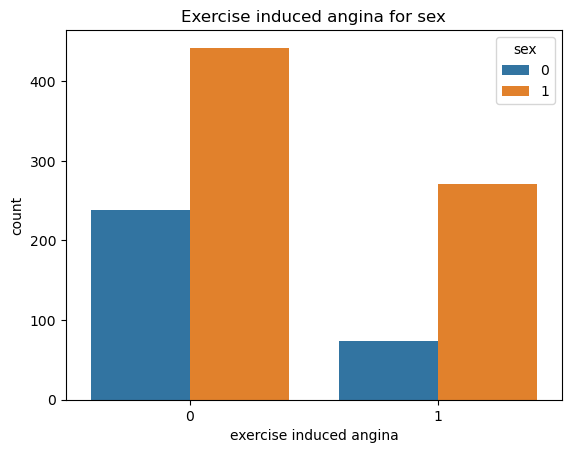

In [33]:
sns.countplot(x = 'exang', data = df, hue = 'sex')
plt.title('Exercise induced angina for sex')
plt.xlabel('exercise induced angina');

So it is clear that `Male` has `exercise induced angina` more than `Female`

# Which sex of people has more fasting blood sugar > 120 mg/dl?

In [34]:
df.fbs.value_counts()

0    872
1    153
Name: fbs, dtype: int64

`1` represent `fbs>120 mg/dl`

`0` represent `fbs<120 mg/dl`

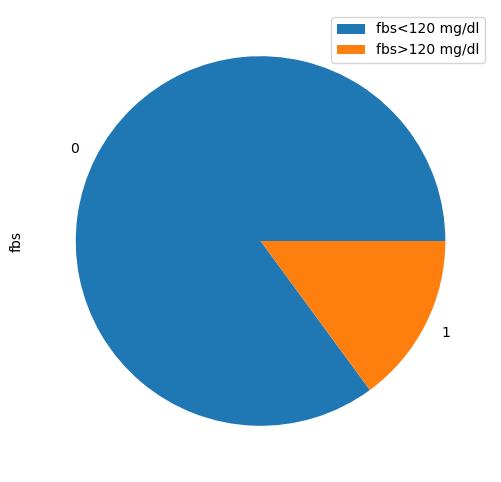

In [35]:
df.fbs.value_counts().plot(kind = 'pie', figsize = (8, 6) )
plt.legend(['fbs<120 mg/dl', 'fbs>120 mg/dl']);

In [36]:
pd.crosstab(df.sex, df.fbs)

fbs,0,1
sex,,
0,270,42
1,602,111


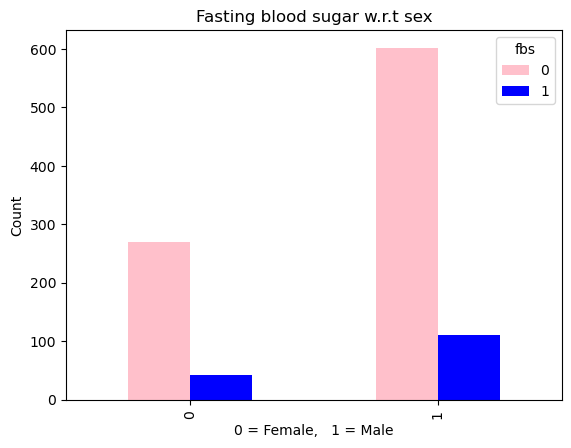

In [37]:
pd.crosstab(df.sex, df.fbs).plot(kind = 'bar', color = ['pink', 'blue'])
plt.title("Fasting blood sugar w.r.t sex")
plt.xlabel("0 = Female,   1 = Male")
plt.ylabel("Count");

`Male` has more fbs > 120 ml/dl than `Female`

# finding the correlation among the features

In [38]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

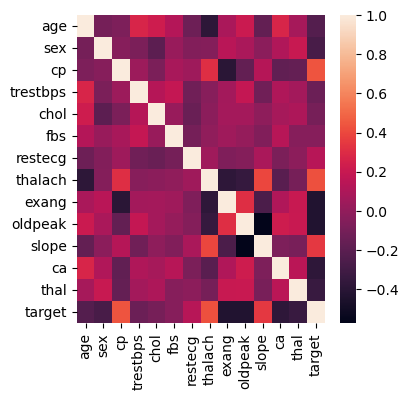

In [39]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr())

# Machine Learning

In [41]:
# creating dependent and independent matrix of features
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [42]:
# create training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 31)

In [43]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 31)
log_clf.fit(x_train, y_train)
print(log_clf.score(x_test, y_test))

0.8521400778210116


In [44]:
from sklearn.metrics import classification_report
y_preds = log_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       115
           1       0.87      0.87      0.87       142

    accuracy                           0.85       257
   macro avg       0.85      0.85      0.85       257
weighted avg       0.85      0.85      0.85       257

